Here we will open a kaggle dataset which will help us find out the dependence of various variables on workout performance.
First let us read the csv file.

In [3]:
import pandas as pd
df=pd.read_csv("./workout_fitness_tracker_data.csv")

Let us get an idea of the dataset

In [5]:
df.head()


User ID  Age  Gender  Height (cm)  Weight (kg) Workout Type  \
0        1   39    Male          175           99      Cycling   
1        2   36   Other          157          112       Cardio   
2        3   25  Female          180           66         HIIT   
3        4   56    Male          154           89      Cycling   
4        5   53   Other          194           59     Strength   

   Workout Duration (mins)  Calories Burned  Heart Rate (bpm)  Steps Taken  \
0                       79              384               112         8850   
1                       73              612               168         2821   
2                       27              540               133        18898   
3                       39              672               118        14102   
4                       56              410               170        16518   

   Distance (km) Workout Intensity  Sleep Hours  Water Intake (liters)  \
0          14.44              High          8.2                    1.9   
1           1.10              High          8.6                    1.9   
2           7.28              High          9.8                    1.9   
3           6.55            Medium          5.8                    1.9   
4           3.17            Medium          7.3                    1.9   

   Daily Calories Intake  Resting Heart Rate (bpm)  VO2 Max  Body Fat (%)  \
0                   3195                        61     38.4          28.5   
1                   2541                        73     38.4          28.5   
2                   3362                        80     38.4          28.5   
3                   2071                        65     38.4          28.5   
4                   3298                        59     38.4          28.5   

  Mood Before Workout Mood After Workout  
0               Tired           Fatigued  
1               Happy          Energized  
2               Happy           Fatigued  
3             Neutral            Neutral  
4            Stressed          Energized

In [7]:
df.shape #(rows,columns)

(10000, 20)

In [9]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

In [11]:
df.describe()

User ID           Age   Height (cm)   Weight (kg)  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000     38.390100    174.275100     84.903000   
std     2886.89568     12.171637     14.440986     20.189937   
min        1.00000     18.000000    150.000000     50.000000   
25%     2500.75000     28.000000    162.000000     67.000000   
50%     5000.50000     38.000000    174.000000     85.000000   
75%     7500.25000     49.000000    187.000000    102.000000   
max    10000.00000     59.000000    199.000000    119.000000   

       Workout Duration (mins)  Calories Burned  Heart Rate (bpm)  \
count             10000.000000     10000.000000      10000.000000   
mean                 64.464800       552.100800        129.526700   
std                  31.814946       260.629908         28.874152   
min                  10.000000       100.000000         80.000000   
25%                  37.000000       325.000000        105.000000   
50%                  64.000000       554.000000        130.000000   
75%                  92.000000       776.000000        155.000000   
max                 119.000000       999.000000        179.000000   

        Steps Taken  Distance (km)   Sleep Hours  Water Intake (liters)  \
count  10000.000000   10000.000000  10000.000000           1.000000e+04   
mean   10455.496600       7.820745      6.982820           1.900000e+00   
std     5486.423716       4.159148      1.708738           2.109529e-14   
min     1000.000000       0.500000      4.000000           1.900000e+00   
25%     5673.000000       4.240000      5.500000           1.900000e+00   
50%    10434.500000       7.850000      7.000000           1.900000e+00   
75%    15211.000000      11.410000      8.400000           1.900000e+00   
max    19998.000000      15.000000     10.000000           1.900000e+00   

       Daily Calories Intake  Resting Heart Rate (bpm)       VO2 Max  \
count           10000.000000              10000.000000  1.000000e+04   
mean             2748.428800                 69.486500  3.840000e+01   
std               717.109026                 11.566763  4.590336e-12   
min              1500.000000                 50.000000  3.840000e+01   
25%              2124.000000                 60.000000  3.840000e+01   
50%              2753.000000                 69.000000  3.840000e+01   
75%              3360.000000                 80.000000  3.840000e+01   
max              3999.000000                 89.000000  3.840000e+01   

       Body Fat (%)  
count       10000.0  
mean           28.5  
std             0.0  
min            28.5  
25%            28.5  
50%            28.5  
75%            28.5  
max            28.5

First we have to remove some redundant data before diving in and doing an EDA #DATA PREPARATION

In [14]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [18]:
df=df.drop(columns = ['User ID'])
df.describe()

Age   Height (cm)   Weight (kg)  Workout Duration (mins)  \
count  10000.000000  10000.000000  10000.000000             10000.000000   
mean      38.390100    174.275100     84.903000                64.464800   
std       12.171637     14.440986     20.189937                31.814946   
min       18.000000    150.000000     50.000000                10.000000   
25%       28.000000    162.000000     67.000000                37.000000   
50%       38.000000    174.000000     85.000000                64.000000   
75%       49.000000    187.000000    102.000000                92.000000   
max       59.000000    199.000000    119.000000               119.000000   

       Calories Burned  Heart Rate (bpm)   Steps Taken  Distance (km)  \
count     10000.000000      10000.000000  10000.000000   10000.000000   
mean        552.100800        129.526700  10455.496600       7.820745   
std         260.629908         28.874152   5486.423716       4.159148   
min         100.000000         80.000000   1000.000000       0.500000   
25%         325.000000        105.000000   5673.000000       4.240000   
50%         554.000000        130.000000  10434.500000       7.850000   
75%         776.000000        155.000000  15211.000000      11.410000   
max         999.000000        179.000000  19998.000000      15.000000   

        Sleep Hours  Water Intake (liters)  Daily Calories Intake  \
count  10000.000000           1.000000e+04           10000.000000   
mean       6.982820           1.900000e+00            2748.428800   
std        1.708738           2.109529e-14             717.109026   
min        4.000000           1.900000e+00            1500.000000   
25%        5.500000           1.900000e+00            2124.000000   
50%        7.000000           1.900000e+00            2753.000000   
75%        8.400000           1.900000e+00            3360.000000   
max       10.000000           1.900000e+00            3999.000000   

       Resting Heart Rate (bpm)       VO2 Max  Body Fat (%)  
count              10000.000000  1.000000e+04       10000.0  
mean                  69.486500  3.840000e+01          28.5  
std                   11.566763  4.590336e-12           0.0  
min                   50.000000  3.840000e+01          28.5  
25%                   60.000000  3.840000e+01          28.5  
50%                   69.000000  3.840000e+01          28.5  
75%                   80.000000  3.840000e+01          28.5  
max                   89.000000  3.840000e+01          28.5

We have removed USER ID column and notice the body fat%, Water Intake (liters) and VO2 Max are 0 standard deviation meaning they are the same for everyone in the dataset

As a matter of providence, the data looks pretty clean to us. Therefore no need to remove redundant or incomplete data. Let us keep it as it is #DATA PREPARATION COMPLETE and move on to EDA. 

Univariate Analysis:

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
from scipy.stats import chi2_contingency
from scipy import stats as st

In [24]:
dfc=df.select_dtypes(include="object")
dfc.head()

Gender Workout Type Workout Intensity Mood Before Workout  \
0    Male      Cycling              High               Tired   
1   Other       Cardio              High               Happy   
2  Female         HIIT              High               Happy   
3    Male      Cycling            Medium             Neutral   
4   Other     Strength            Medium            Stressed   

  Mood After Workout  
0           Fatigued  
1          Energized  
2           Fatigued  
3            Neutral  
4          Energized

In [27]:
dfn=df.select_dtypes(exclude="object")
dfn.head()

Age  Height (cm)  Weight (kg)  Workout Duration (mins)  Calories Burned  \
0   39          175           99                       79              384   
1   36          157          112                       73              612   
2   25          180           66                       27              540   
3   56          154           89                       39              672   
4   53          194           59                       56              410   

   Heart Rate (bpm)  Steps Taken  Distance (km)  Sleep Hours  \
0               112         8850          14.44          8.2   
1               168         2821           1.10          8.6   
2               133        18898           7.28          9.8   
3               118        14102           6.55          5.8   
4               170        16518           3.17          7.3   

   Water Intake (liters)  Daily Calories Intake  Resting Heart Rate (bpm)  \
0                    1.9                   3195                        61   
1                    1.9                   2541                        73   
2                    1.9                   3362                        80   
3                    1.9                   2071                        65   
4                    1.9                   3298                        59   

   VO2 Max  Body Fat (%)  
0     38.4          28.5  
1     38.4          28.5  
2     38.4          28.5  
3     38.4          28.5  
4     38.4          28.5

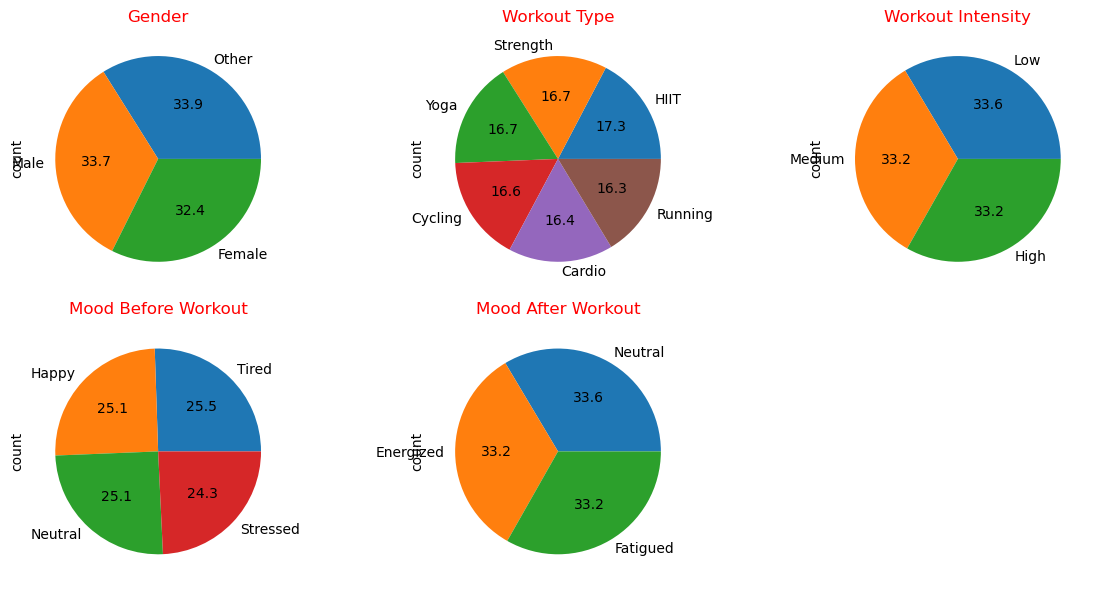

In [29]:
plt.figure(figsize = (12,6))
colors = sns.color_palette('pastel')[0:5]
for i,cols in enumerate(dfc.columns):
    plt.subplot(2,3,1+i)
    dfc[cols].value_counts().plot(kind='pie',autopct='%0.1f',color=colors)
    plt.title(cols,color='red')
plt.tight_layout()
plt.show()

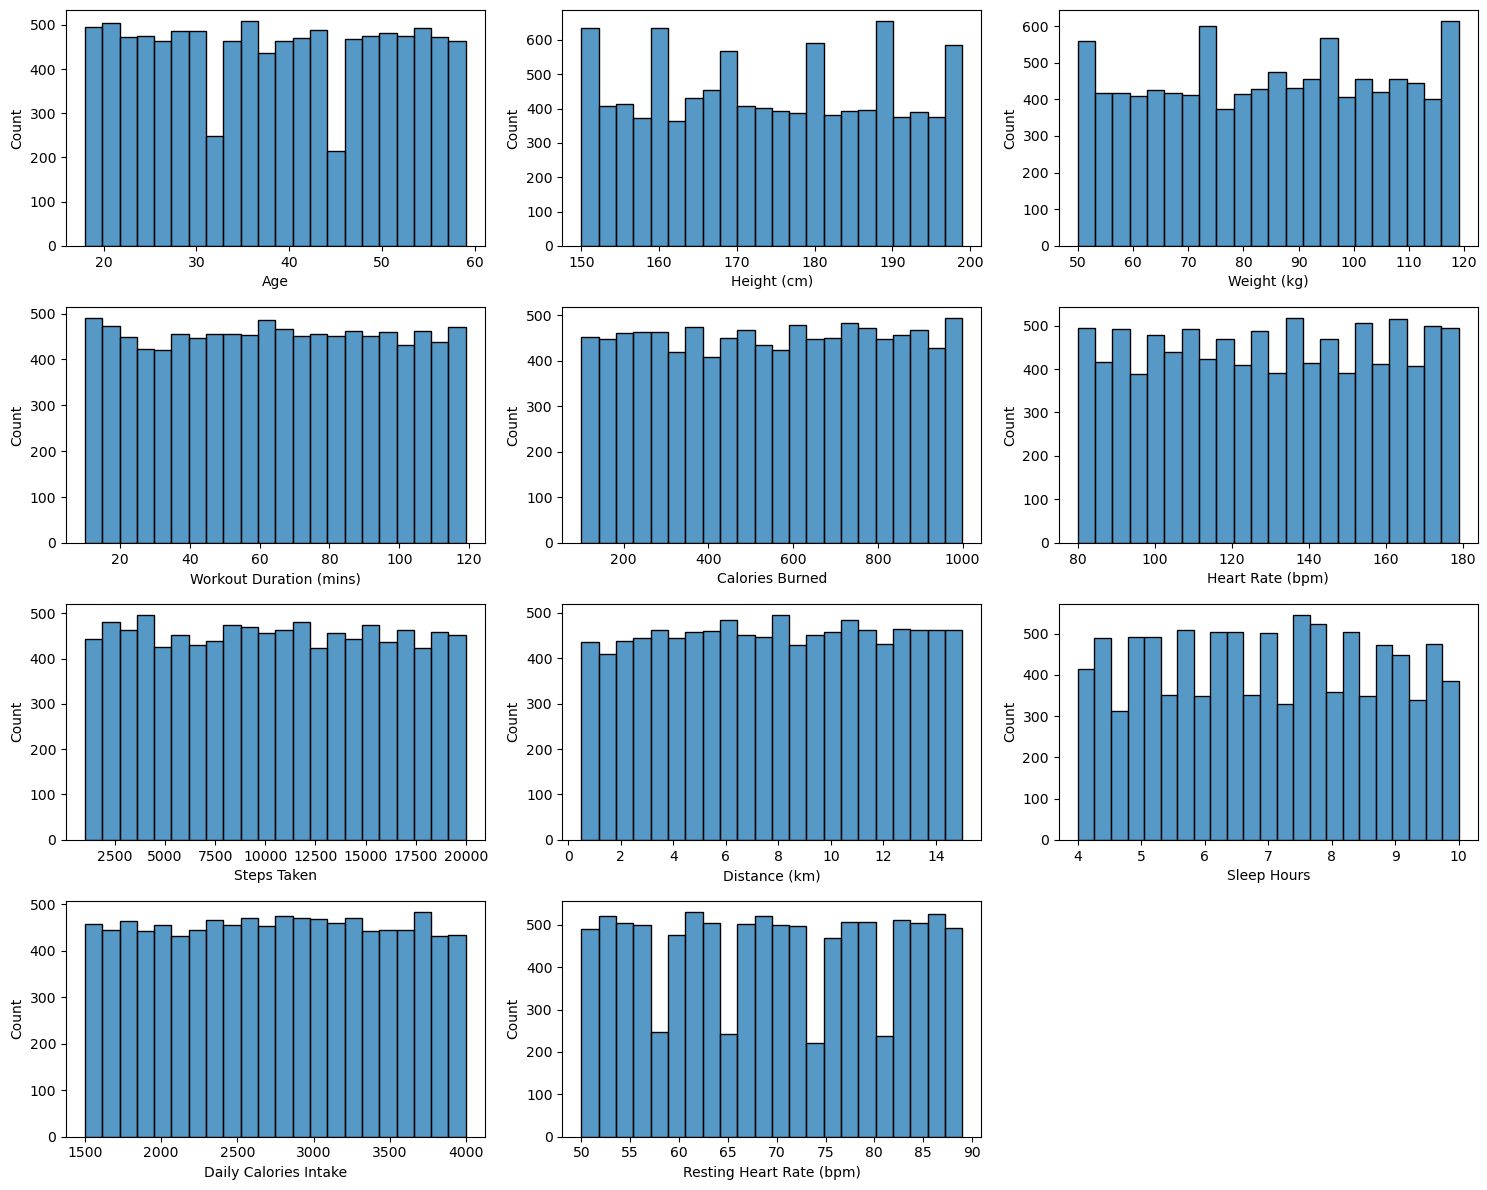

In [31]:
plt.figure(figsize = (15,12))
for i, cols in enumerate(dfn.drop(columns=["Water Intake (liters)","VO2 Max","Body Fat (%)"]).columns):
    plt.subplot(4,3,i+1)
    sns.histplot(data = dfn,x = cols)
plt.tight_layout()
plt.show()

Looks like a nice dataset with a near perfect random sample

Bivariate Analysis

categorical with categorical

Finding correlation between workout type and workout intensity using heatmap

In [37]:
cross_tab_norm = pd.crosstab(df['Workout Type'], df['Workout Intensity'], margins=True, values=df["Workout Intensity"], aggfunc=pd.Series.count, normalize="index")
print(cross_tab_norm)

Workout Intensity      High       Low    Medium
Workout Type                                   
Cardio             0.339210  0.344073  0.316717
Cycling            0.329106  0.322464  0.348430
HIIT               0.314847  0.340843  0.344310
Running            0.330887  0.341896  0.327217
Strength           0.348530  0.346131  0.305339
Yoga               0.330132  0.318727  0.351140
All                0.332000  0.335700  0.332300


<Axes: xlabel='Workout Intensity', ylabel='Workout Type'>

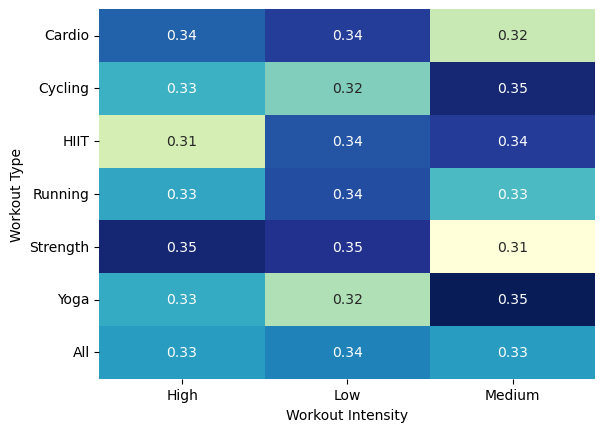

In [39]:
sns.heatmap(cross_tab_norm, cmap="YlGnBu", annot=True, cbar=False)

In [41]:
c, p, dof, expected = chi2_contingency(cross_tab_norm) 
print(p)

1.0


Looks like workouts have their own low to high intensities and all of them are equally intense. (No relation as p=100%)
Let us look at the role of gender in workout intensity and subsequent mood

In [44]:
cross_tab_norm = pd.crosstab(df['Gender'], df['Workout Intensity'], margins=True, values=df["Workout Intensity"], aggfunc=pd.Series.count, normalize= "index")
print(cross_tab_norm)

Workout Intensity      High       Low    Medium
Gender                                         
Female             0.341260  0.325818  0.332922
Male               0.329377  0.346588  0.324036
Other              0.325767  0.334316  0.339917
All                0.332000  0.335700  0.332300


<Axes: xlabel='Workout Intensity', ylabel='Gender'>

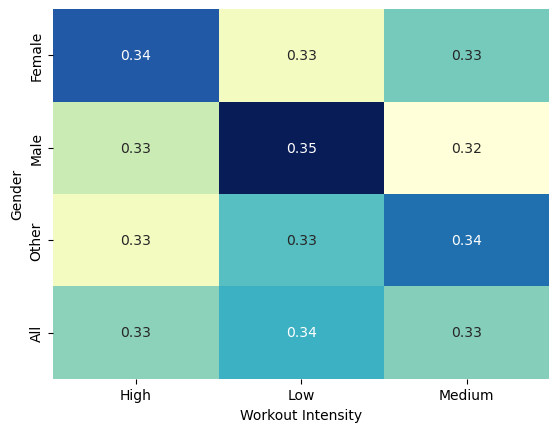

In [46]:
sns.heatmap(cross_tab_norm, cmap="YlGnBu", annot=True, cbar=False)

In [48]:
c, p, dof, expected = chi2_contingency(cross_tab_norm) 
print(p)

0.9999999999395085


Looks similar. (No relation as p=100%)

In [51]:
cross_tab_norm = pd.crosstab(df['Gender'], df['Mood After Workout'], margins=True, values=df["Mood After Workout"], aggfunc=pd.Series.count, normalize="index")
print(cross_tab_norm)

Mood After Workout  Energized  Fatigued   Neutral
Gender                                           
Female               0.325201  0.326745  0.348054
Male                 0.338872  0.326409  0.334718
Other                0.332547  0.342866  0.324587
All                  0.332300  0.332100  0.335600


<Axes: xlabel='Mood After Workout', ylabel='Gender'>

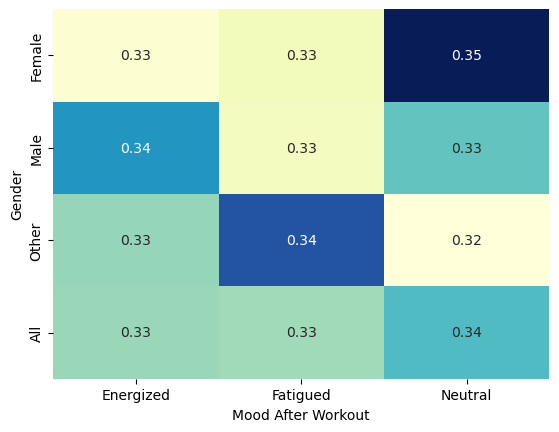

In [53]:
sns.heatmap(cross_tab_norm, cmap="YlGnBu", annot=True, cbar=False)

In [55]:
c, p, dof, expected = chi2_contingency(cross_tab_norm) 
print(p)

0.999999999908153


Surprisingly no difference. (No relation as p=99.99%)

In [58]:
cross_tab_norm = pd.crosstab(df['Mood Before Workout'], df['Mood After Workout'], margins=True, values=df["Mood After Workout"], aggfunc=pd.Series.count)
print(cross_tab_norm)

Mood After Workout   Energized  Fatigued  Neutral    All
Mood Before Workout                                     
Happy                      817       886      808   2511
Neutral                    831       807      873   2511
Stressed                   832       802      791   2425
Tired                      843       826      884   2553
All                       3323      3321     3356  10000


It seems the data is completely randomised based on the categorical variables so let us move on to numerical

Numerical with Numerical

Pairplots of the numerical data

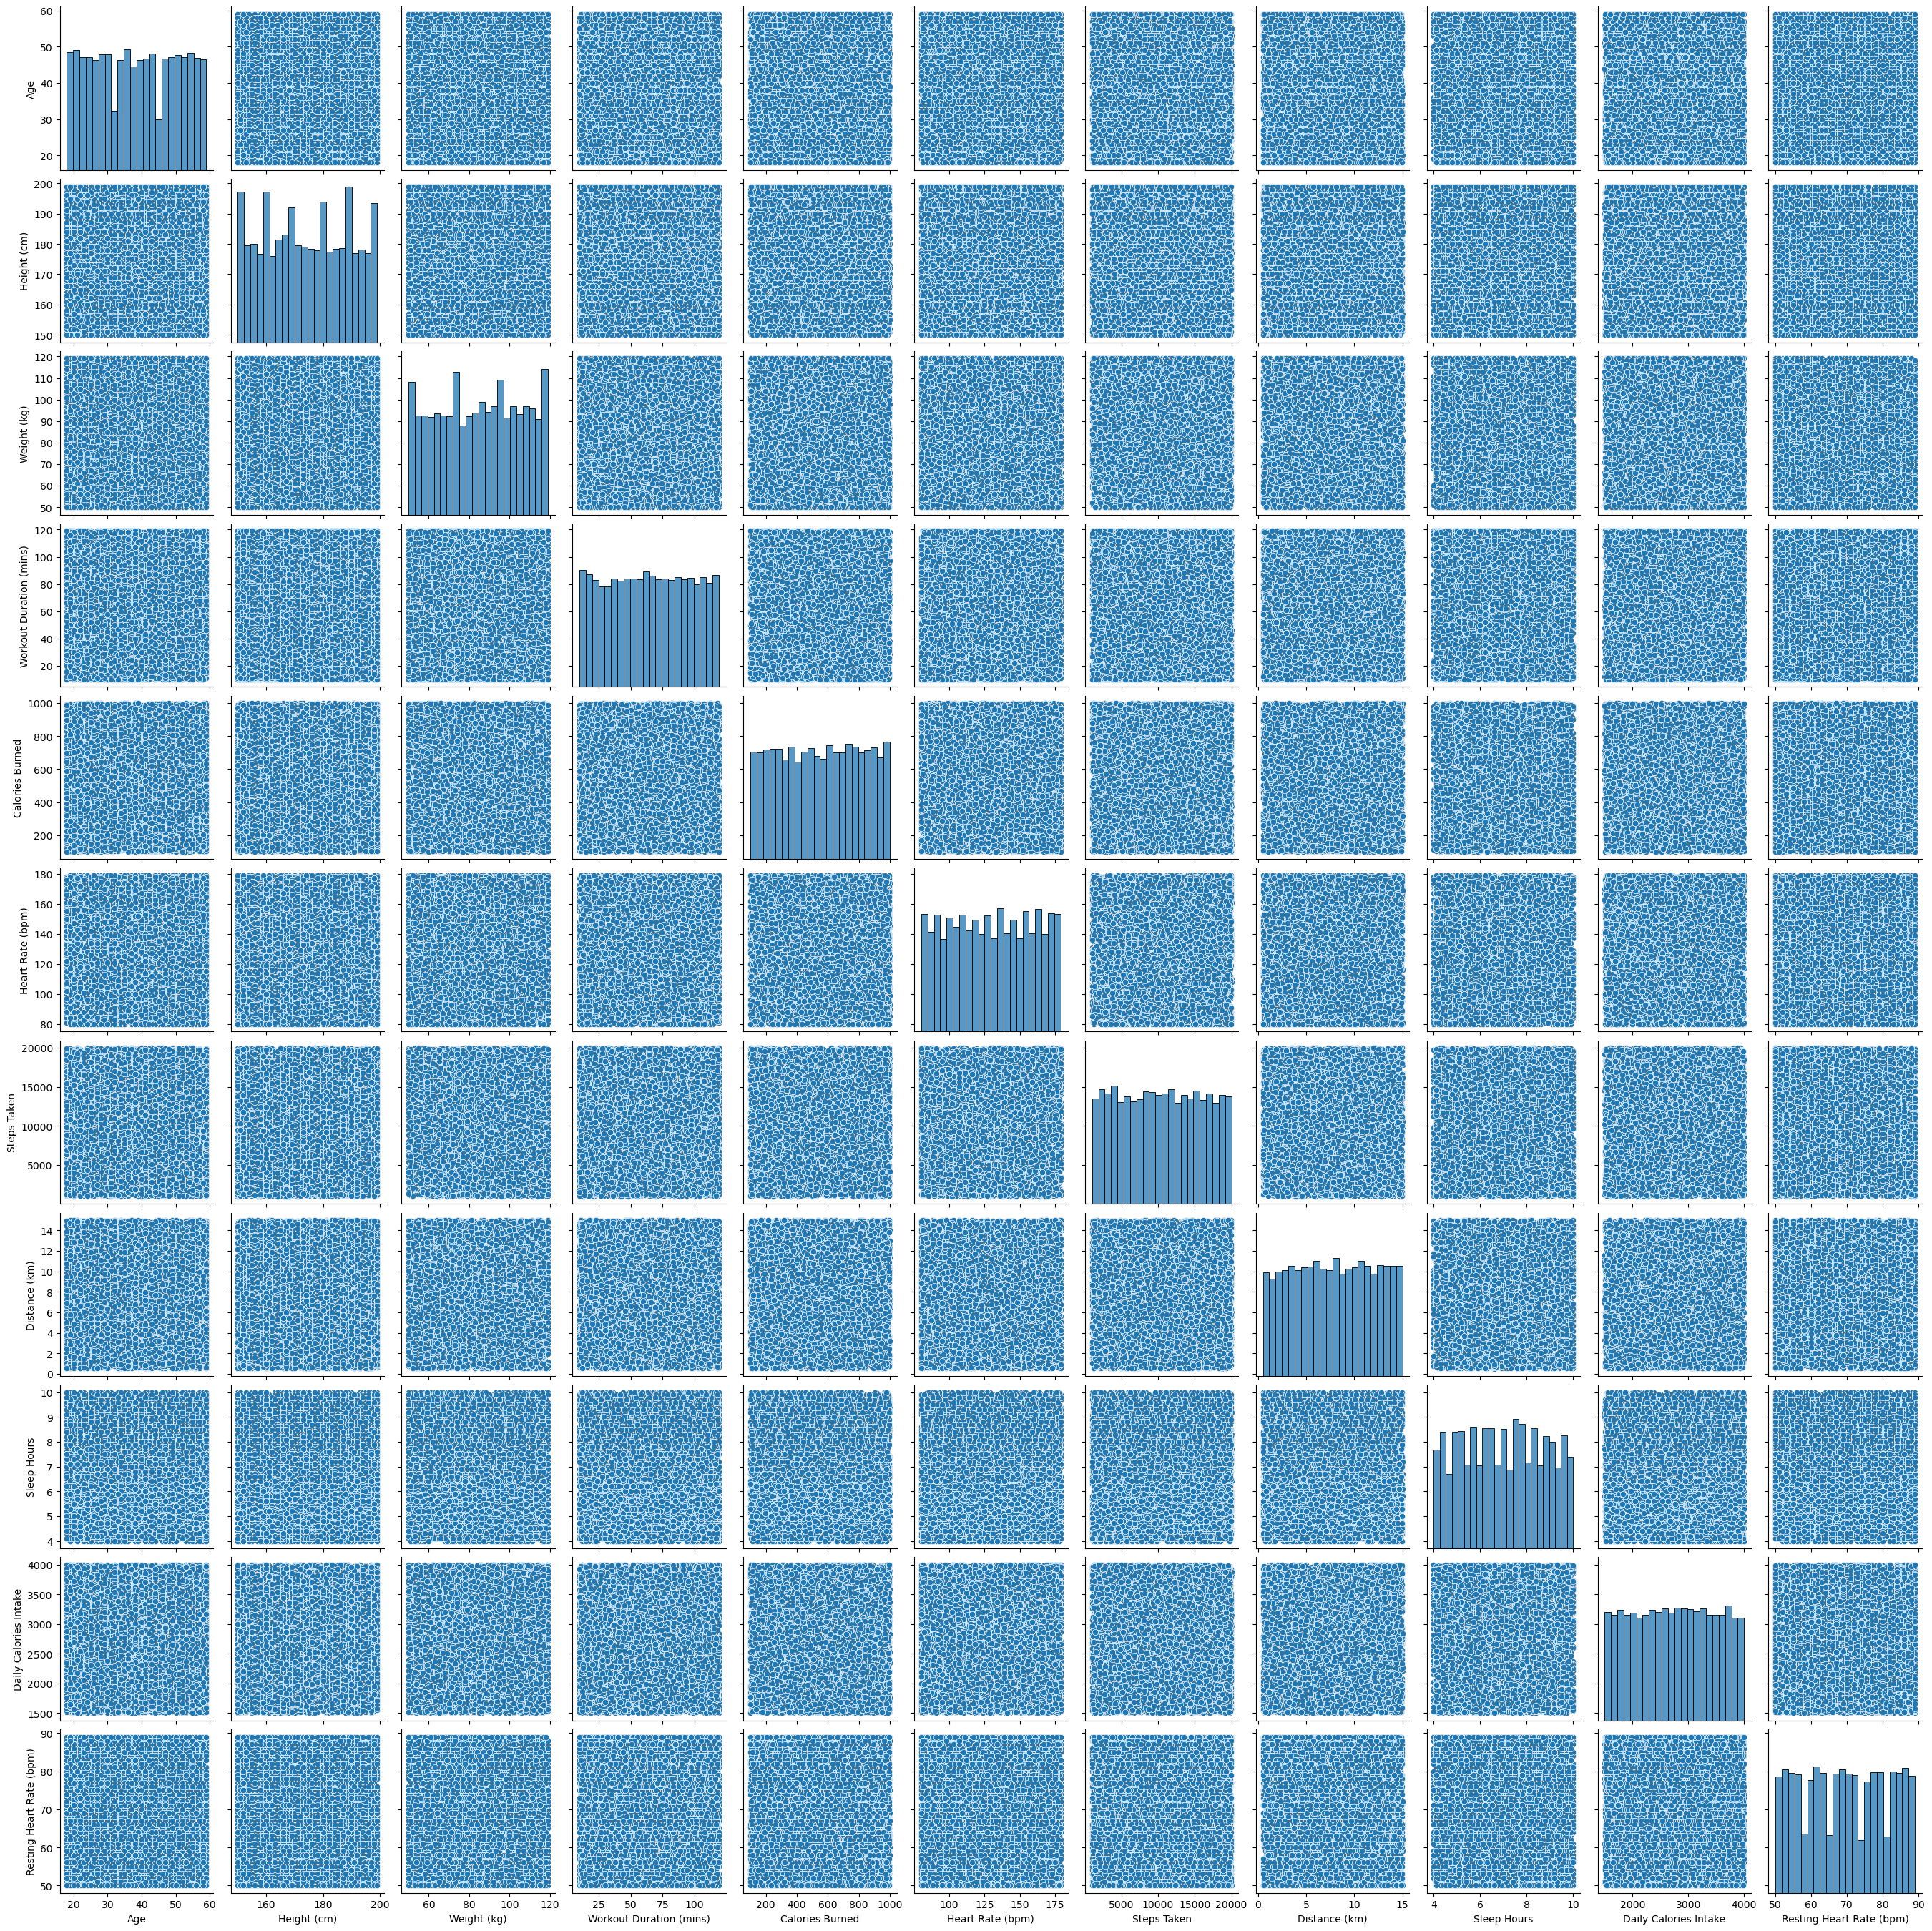

In [63]:
dfnh=dfn.drop(columns=["Water Intake (liters)","VO2 Max","Body Fat (%)"])
g=sns.pairplot(dfnh)
plt.show(g)

Let us find the correlation between each of the values

Age  Height (cm)  Weight (kg)  \
Age                       1.000000    -0.009205    -0.011209   
Height (cm)              -0.009205     1.000000    -0.009844   
Weight (kg)              -0.011209    -0.009844     1.000000   
Workout Duration (mins)   0.011027     0.002235     0.005897   
Calories Burned           0.009123    -0.002398    -0.023416   
Heart Rate (bpm)          0.000034     0.022059     0.007948   
Steps Taken               0.006511     0.019174    -0.010690   
Distance (km)            -0.012522     0.011993     0.016232   
Sleep Hours              -0.002267    -0.007164     0.007770   
Daily Calories Intake    -0.006133     0.003806    -0.000810   
Resting Heart Rate (bpm)  0.006970     0.010121    -0.005885   

                          Workout Duration (mins)  Calories Burned  \
Age                                      0.011027         0.009123   
Height (cm)                              0.002235        -0.002398   
Weight (kg)                              0.005897        -0.023416   
Workout Duration (mins)                  1.000000        -0.006739   
Calories Burned                         -0.006739         1.000000   
Heart Rate (bpm)                        -0.006424        -0.006594   
Steps Taken                             -0.029781         0.001744   
Distance (km)                           -0.013654         0.009488   
Sleep Hours                             -0.005921        -0.000041   
Daily Calories Intake                    0.000001         0.010564   
Resting Heart Rate (bpm)                 0.002990         0.005639   

                          Heart Rate (bpm)  Steps Taken  Distance (km)  \
Age                               0.000034     0.006511      -0.012522   
Height (cm)                       0.022059     0.019174       0.011993   
Weight (kg)                       0.007948    -0.010690       0.016232   
Workout Duration (mins)          -0.006424    -0.029781      -0.013654   
Calories Burned                  -0.006594     0.001744       0.009488   
Heart Rate (bpm)                  1.000000     0.002695       0.011946   
Steps Taken                       0.002695     1.000000       0.009269   
Distance (km)                     0.011946     0.009269       1.000000   
Sleep Hours                      -0.001311     0.012577      -0.010175   
Daily Calories Intake             0.011315    -0.007677       0.009318   
Resting Heart Rate (bpm)         -0.021962    -0.003666       0.010726   

                          Sleep Hours  Daily Calories Intake  \
Age                         -0.002267              -0.006133   
Height (cm)                 -0.007164               0.003806   
Weight (kg)                  0.007770              -0.000810   
Workout Duration (mins)     -0.005921               0.000001   
Calories Burned             -0.000041               0.010564   
Heart Rate (bpm)            -0.001311               0.011315   
Steps Taken                  0.012577              -0.007677   
Distance (km)               -0.010175               0.009318   
Sleep Hours                  1.000000               0.006813   
Daily Calories Intake        0.006813               1.000000   
Resting Heart Rate (bpm)    -0.012484              -0.004957   

                          Resting Heart Rate (bpm)  
Age                                       0.006970  
Height (cm)                               0.010121  
Weight (kg)                              -0.005885  
Workout Duration (mins)                   0.002990  
Calories Burned                           0.005639  
Heart Rate (bpm)                         -0.021962  
Steps Taken                              -0.003666  
Distance (km)                             0.010726  
Sleep Hours                              -0.012484  
Daily Calories Intake                    -0.004957  
Resting Heart Rate (bpm)                  1.000000

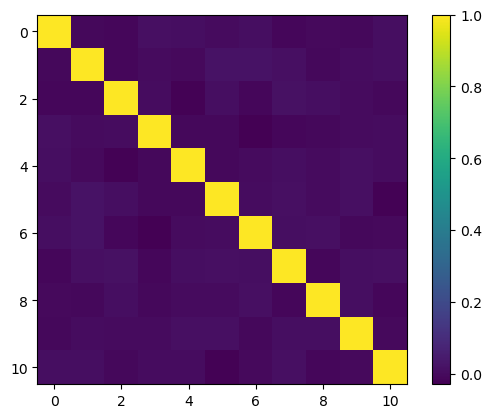

In [65]:
b=dfnh.corr()
a = plt.imshow(b)
bar = plt.colorbar(a) 
print(bar)
b

Surprisingly no correlation between each other

Numerical with Categorical

Calories Burnt with Workout Intensity

<Axes: xlabel='Workout Intensity', ylabel='Calories Burned'>

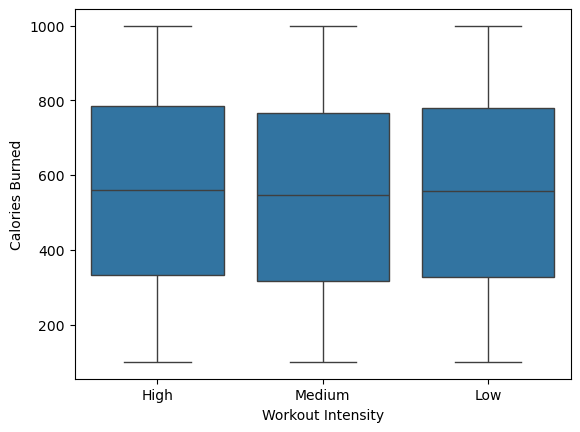

In [67]:
sns.boxplot(x='Workout Intensity',y='Calories Burned',data=df)

All of them look similar. 

Age with workout duration.

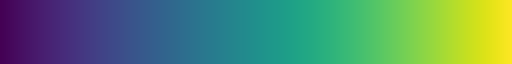

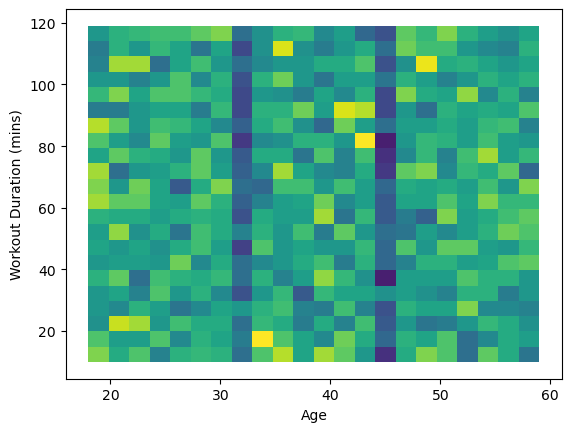

In [71]:
sns.histplot(data=df,x= 'Age',y='Workout Duration (mins)',cmap='viridis')
sns.color_palette("viridis", as_cmap=True)

At around age 32 and 45 is mostly "under" thus prompting those ages to be least likely filled with gym activity

<Axes: xlabel='Workout Intensity', ylabel='Height (cm)'>

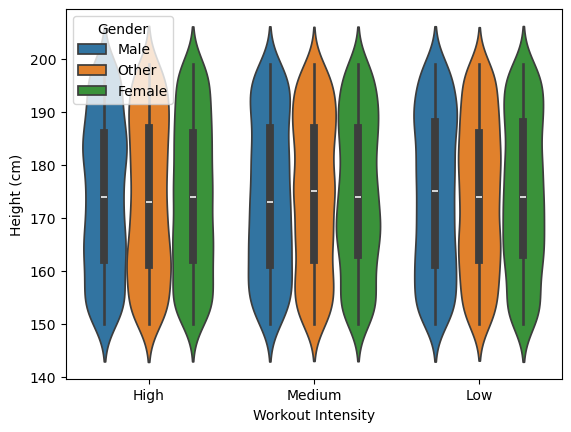

In [74]:
sns.violinplot(data=df,x= 'Workout Intensity',y='Height (cm)',hue='Gender')

No relation 

Conclusion
Here we conclude the EDA. 
The depiction shows that this dataset is highly randomised and seemingly hard to find correlation between two variables.
Maybe including more variables per plot can provide us with better analysis results. 